# 02. Flows on the line
---

**Overview**

* [02.00. Introduction](#0200_introduction)
* [02.01. A Geometric way of Thinking](#0201_a_geometric_way_of_thinking)
* [02.02. Fixed Points and Stability](#0202_fixed_points_and_stability)
    * [Example 2.2.1](#example_221)
    * [Example 2.2.2](#example_222)
    * [Example 2.2.3](#example_223)
* [02.03. Population Growth](#0203_population_growth)
    * [02.03.01. Critique of the Logistic Model](#020301_critique_of_the_logistic_model)
* [02.04. Linear Stability Analysis](#0204_linear_stability_analysis)
    * [Example 2.4.1](#example_241)
* [02.05. Existence and Uniquness](#0205_existence_and_uniquness)
    * [Example 2.5.1](#example_251)
    * [Example 2.5.2](#example_252)
* [02.06. Impossibility of Oscillations](#0206_impossibility_of_oscillations)
    * [02.06.01. Mechanical Analog: Overdamped Systems](#020601_mechanical_analog_overdamped_systems)
* [02.07. Potentials](#0207_potentials)
    * [Example 2.7.1](#example_271)
* [02.08. Solving Equations on the Computer](#0208_solving_equations_on_the_computer)
    * [02.08.01. Euler's Method](#020801_eulers_method)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

## 02.00. Introduction
---

$$
    \begin{align*}
        \dot{x}_1 &= f_1(x_1, \cdots, x_n) \\
        & \vdots \\
        \dot{x}_n &= f_n(x_1, \cdots, x_n)
    \end{align*}
$$

$n = 1$

$$ \dot{x} = f(x) $$

**one-dimensinal** / **first-order system**


## 02.01. A Geometric way of Thinking
---

$$ \dot{x} = \sin x \tag{1} $$

$$ dt = \frac{dx}{\sin x} $$

implies: 
$$
    \begin{align*}
        t &= \int \csc x \, \mathrm{d}x \\
        &= - \ln |\csc x + \cot x | + C
    \end{align*}
$$

$$ t = \ln \Big|\frac{\csc x_0 + \cot x_0}{\csc x + \cot x}\Big| \tag{2} $$



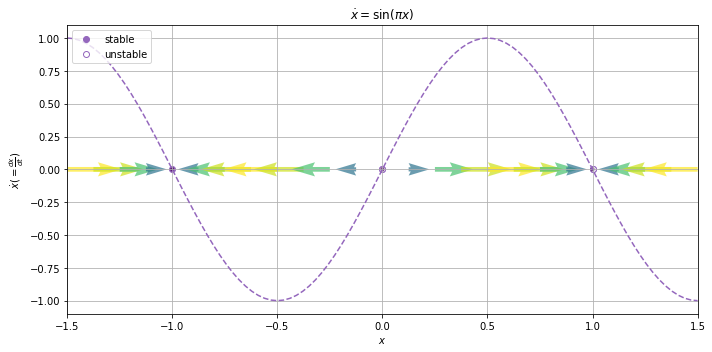

In [50]:
pi = np.pi

def f(x):
    return np.sin(x * np.pi)

x = np.linspace(-3/2, 3/2, 100)
stable = np.arange(-1, 1.5, 1.0)
unstable = np.arange(0.0, 1.5, 1.0)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, f(x), color=c[4], linestyle='--')

ax.scatter(stable, f(stable), marker='o', label='stable', c=c[4])#, fillstyle='top')
ax.scatter(unstable, f(unstable), marker='o', label='unstable', edgecolor=c[4], facecolor='white')


# flow_pos = np.arange(-pi*3/2, pi*7/2, pi*2)
# plt.scatter(flow_pos, np.repeat(0, len(flow_pos)), marker='>', c='darkblue')

# flow_neg = np.arange(-pi*5/2, pi*5/2, pi*2)
# plt.scatter(flow_neg, np.repeat(0, len(flow_neg)), marker='<', c='darkblue')

# x_flow = np.arange(-pi*3+pi/2, pi*4, pi)

X = np.linspace(-3/2, 3/2, 25)
ax.quiver(X, np.repeat(0, len(X)), f(X), np.repeat(0, len(X)), np.abs(f(X)), cmap='viridis', alpha=.7)
            
ax.set_title(r'$\dot{x} = \sin(\pi x)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\dot{x} (= \frac{dx}{dt})$')
ax.legend(loc='upper left')
ax.grid(True)
ax.set_xlim(-3/2, 3/2)
#plt.xticks(np.arange(-pi*3/2, pi*3/2, pi),
#              (r'$-3\pi$', r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'))

plt.tight_layout()
plt.savefig('fig/fig020101.png')
plt.show()

**fixed point**
- **stable**
- **unstable**

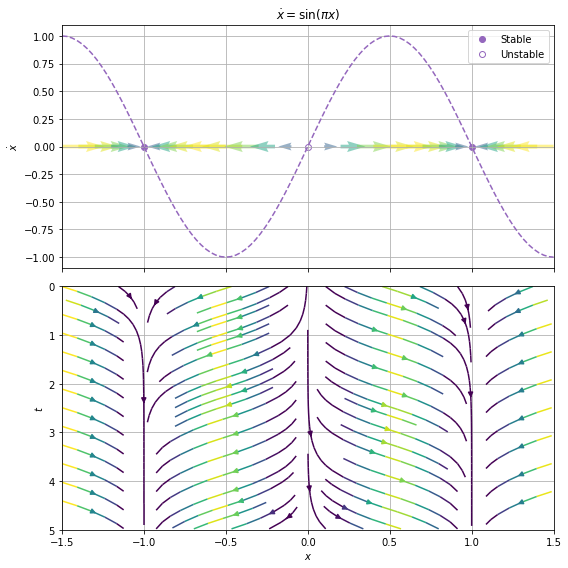

In [51]:
def f(x):
    return np.sin(x * np.pi)

def flow(x0, t0, iteration, dt):
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        
        xs = np.append(xs, xi + f(xi)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts

x = np.linspace(-1.5, 1.5, 100)
X = np.linspace(-1.5, 1.5, 31)
stable = np.arange(-1, 3, 2)
unstable = np.arange(-2, 3, 2)
x0s = np.arange(-2, 2+.1, 1/8)
t0 = 0

fig, ax = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax[0].plot(x, f(x), linestyle='--', color=c[4])
ax[0].quiver(X, np.repeat(0, len(X)), f(X), np.repeat(0, len(X)), np.abs(f(X)), alpha=.5)
ax[0].scatter(stable, f(stable), facecolor=c[4], edgecolor=c[4], label='Stable', alpha=1)
ax[0].scatter(unstable, f(unstable), facecolor='white', edgecolor=c[4], label='Unstable', alpha=1)

ax[0].set_xlim(-1.5, 1.5)
ax[0].set_title(r'$\dot{x} = \sin{(\pi x)}$')
ax[0].grid(True)
ax[0].legend(loc='best')
ax[0].set_ylabel(r'$\dot{x}$')

x, t = np.linspace(-1.5, 1.5, 10), np.linspace(0, 5.0, 10)
X, T = np.meshgrid(x, t)

# for x0 in x0s:
#     xs, ts = flow(x0, t0, 60, .1)
#     ax[1].plot(xs, ts, color=c[2])

ax[1].streamplot(X, T, f(X), np.tile(1, (10, 10)), color=np.abs(f(X)), cmap='viridis')

ax[1].grid(True)
# ax.set_xlabel(r'$t$')
# ax.set_ylabel(r'$x$')
ax[1].set_ylim(5.0, 0)
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$t$')
#plt.xticks(np.arange(-pi*2, pi*2+.1, pi/2), 
#           (r'$-2\pi$', r'$-\frac{3}{2}\pi$', r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$', r'$\frac{3}{2}\pi$', r'$2\pi$'))

plt.tight_layout()
plt.savefig('fig/fig020101-03.png')
plt.show()

## 02.02. Fixed Points and Stability
---

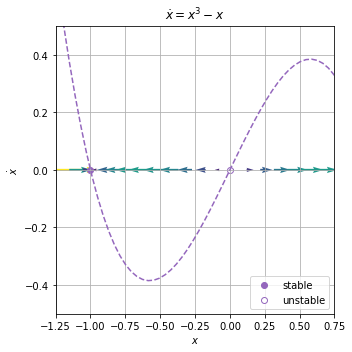

In [52]:
def dx_dt(x):
    return - x**3 + x

x = np.linspace(-2, 2, 100)
X = np.linspace(-1.25, 1, 24)
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, dx_dt(x), color=c[4], linestyle='--')
ax.quiver(X, np.repeat(0, len(X)), dx_dt(X), np.repeat(0, len(X)), np.abs(dx_dt(X)), cmap='viridis')
ax.scatter(-1, 0, marker='o', facecolor=c[4], edgecolor=c[4], label='stable')
ax.scatter(0, 0, marker='o', facecolor='white', edgecolor=c[4], label='unstable')
ax.scatter(1, 0, marker='o', facecolor=c[4], edgecolor=c[4])#, label='stable')

ax.grid(True)
ax.legend(loc='best')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\dot{x}$')
ax.set_xlim(-1.25, .75)
ax.set_ylim(-.5, .5)
ax.set_title(r'$\dot{x} = x^3 - x$')

plt.tight_layout()
plt.savefig('fig/fig020201.png')
plt.show()

- **phase point**: imaginary point
- **phase portrait**: qualitatively different trajectories

### Example 2.2.1

$$ \dot{x} = x^2 - 1 $$

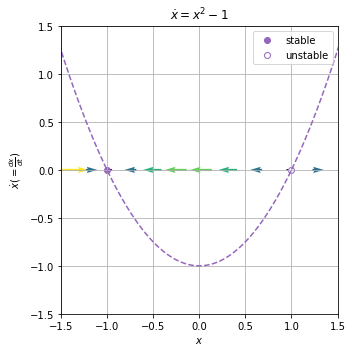

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    x_ = x**2 - 1
    return x_

x = np.linspace(-2, 2, 100)
x_dot = f(x)

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, x_dot, color=c[4], linestyle='--')

stable = -1
ax.scatter(stable, f(stable), label='stable', marker='o', c=c[4])

unstable = 1
ax.scatter(unstable, f(unstable), label='unstable', marker='o', facecolor='white', edgecolor=c[4])


X = np.linspace(-1.5, 1.5, 12)
ax.quiver(X, 0, f(X), 0, np.abs(f(X)), cmap='viridis')


ax.set_title(r'$\dot{x} = x^2 - 1$')
ax.legend(loc='best')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\dot{x} (= \frac{dx}{dt})$')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True)

plt.tight_layout()
plt.savefig('fig/fig020202.png')
plt.show()

### Example 2.2.2

$$ -V_0 + RI + \frac{Q}{C} = 0 $$
$$ \dot{Q} = I $$

$$ - V_0 + R\dot{Q} + \frac{Q}{C} = 0 $$
$$ \dot{Q} = f(Q) = \frac{V_0}{R} - \frac{Q}{RC} $$



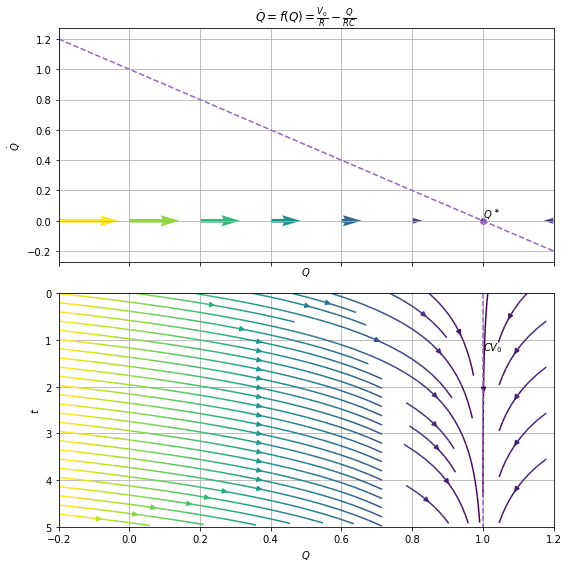

In [66]:
V_0, R, C = 1, 1, 1

def f(Q):
    return V_0/R - Q/(R*C)

def flow(x0, t0, iteration, dt):
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        
        xs = np.append(xs, xi + f(xi)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts

n = 8
q = np.linspace(-.2, 1.2, 50)
Q = np.linspace(-.2, 1.2, n)

fig, ax = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

ax[0].plot(q, f(q), color=c[4], linestyle='--')
ax[0].scatter(1, 0, facecolor=c[4], edgecolor=c[4])

ax[0].quiver(Q, 0, f(Q), 0, np.abs(f(Q)), cmap='viridis')
ax[0].text(1.0, f(1.0), r'$Q^\ast$', va='bottom', ha='left')

ax[0].set_xlabel(r'$Q$')
ax[0].set_ylabel(r'$\dot{Q}$')
ax[0].set_xlim(-0.2, 1.2)
ax[0].set_title(r'$\dot{Q} = f(Q) = \frac{V_0}{R} - \frac{Q}{RC}$')
ax[0].grid(True)

x0s = np.linspace(-.2, 1.2, 5)
# for x0 in x0s:
#     xs, ts = flow(x0, 0, 50, .1)
#     ax[1].plot(xs, ts, color=c[4])

q = np.linspace(-.2, 1.2, n)
t = np.linspace(0, 5, n)
Q, T = np.meshgrid(q, t)
ax[1].streamplot(Q, T, f(Q), np.tile(1, (n, n)), color=np.abs(f(Q)), cmap='viridis')
    
ax[1].plot(np.repeat(1.0, 10), np.linspace(-0.0, 5.0, 10), linestyle='--', color=c[4])
# ax[1].text(xs[0], ts[0], (r'$x_0 = $' '{}'.format(xs[0])), va='top', ha='center')
ax[1].text(1.0, 1.0, r'$CV_0$', va='top', ha='left')

ax[1].set_ylabel(r'$t$')
ax[1].set_xlabel(r'$Q$')
ax[1].set_ylim(5, 0)
# ax[1].set_ylim(-., 1.25)
ax[1].grid(True)

plt.tight_layout()
plt.savefig('fig/fig020204-05.png')
plt.show()

### Example 2.2.3

$$ \dot{x} = x - \cos{x} $$



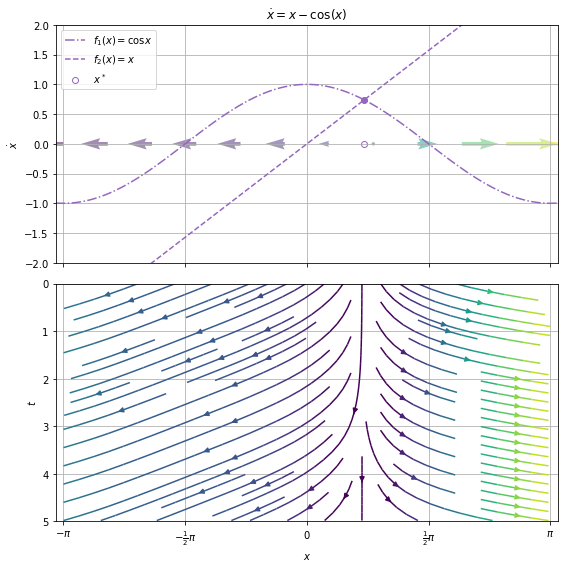

In [75]:
def f(x):
    return x - np.cos(x)

def f_1(x):
    return np.cos(x)

def f_2(x):
    y = x
    return y

def flow(x0, t0, iteration, dt):
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        
        xs = np.append(xs, xi + f(xi)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts

def approx(x_min, x_max, iteration):
    x1 = x_min
    x2 = x_max
    x3s = np.array([x2])
    
    for i in range(iteration):
        x3 = (x1 + x2) / 2
        
        y1s = np.sign(f(x1))
        y2s = np.sign(f(x2))
        y3s = np.sign(f(x3))
        
        if y1s * y3s < 0:
            x2 = x3
        elif y2s * y3s < 0:
            x1 = x3
        else:
            break
        
        x3s = np.append(x3s, x3)
    return (x1 + x2) / 2

fig, ax = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

x = np.linspace(-np.pi-.1, np.pi+.1, 100)
y = f(x)
# plt.plot(x, y, label=r'$\dot{x} = x - \cos{x}$', c=c[0])

x_1 = np.linspace(-np.pi, np.pi, 100)
y_1 = f_1(x)
ax[0].plot(x, y_1, label=r'$f_1(x) = \cos{x}$', linestyle=l[2], c=c[4])

x_2 = np.linspace(-2, 2, 100)
y_2 = f_2(x)
ax[0].plot(x, y_2, label=r'$f_2(x) = x$', linestyle=l[1], c=c[4])

x_flow = np.linspace(-np.pi, np.pi, 12)
y_flow = np.repeat(0, len(x_flow))
l_flow = f(x_flow)
ax[0].quiver(x_flow, y_flow, f(x_flow), 0, f(x_flow), alpha=.5)

x_star = approx(0.0, np.pi/2, 10)
ax[0].scatter(x_star, f_1(x_star), color=c[4])
ax[0].scatter(x_star, f(x_star), facecolor='white', edgecolor=c[4], label=r'$x^*$')


ax[0].set_title(r'$\dot{x} = x - \cos(x)$')
ax[0].set_ylabel(r'$\dot{x}$')
ax[0].set_xlim(-np.pi-.1, np.pi+.1)
ax[0].set_ylim(-2.0, 2.0)
ax[0].legend(loc='upper left')
ax[0].grid(True)

x0s = np.linspace(np.pi/5, np.pi/4, 32)

# for x0 in x0s:
#     xs, ts = flow(x0, t0, 100, .1)
#     ax[1].plot(xs, ts, color=c[2])

n = 10
x, t = np.linspace(-np.pi, np.pi, n), np.linspace(0, 5, n)
X, T = np.meshgrid(x, t)

ax[1].streamplot(X, T, f(X), np.tile(1, (n, n)), color=np.abs(f(X)), cmap='viridis')

plt.xticks(np.arange(-np.pi*2, np.pi*2+.1, pi/2), (r'$-2\pi$', r'$-\frac{3}{2}\pi$', r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$', r'$\frac{3}{2}\pi$', r'$2\pi$'))
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$t$')
ax[1].set_xlim(-np.pi-.1, np.pi+.1)
ax[1].set_ylim(5, 0)
ax[1].grid(True)

plt.tight_layout()
plt.savefig('fig/fig020206.png')
plt.show()

## 02.03. Population Growth
---

$$ \dot{N} = rN $$

$$ N(t) = N_0e^rt $$

**Carrying capacity**: $K$

**Logistic eq**
$$ \dot{N} = rN \Big(1 - \frac{N}{K} \Big) $$

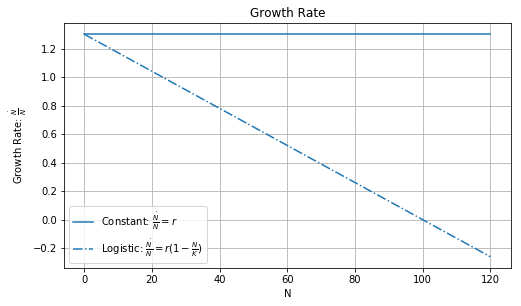

In [17]:
import matplotlib.pyplot as plt
import numpy as np

r = 1.3
K = 100

N = np.linspace(0, 120, 100)

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.plot(N, np.repeat(r, len(N)), label='Constant: ' r'$\frac{\dot{N}}{N} = r$')

def GR(N, r, K):
    rate = r * (1 - N/K)
    return rate

rate = GR(N, r, K)

ax.plot(N, rate, label='Logistic: ' r'$\frac{\dot{N}}{N} = r(1 - \frac{N}{K})$', linestyle=l[2], c=c[0])

ax.set_xlabel('N')
ax.set_ylabel('Growth Rate: ' r'$\frac{\dot{N}}{N}$')
ax.grid(True)
ax.legend(loc='lower left')
ax.set_title('Growth Rate')
plt.show()

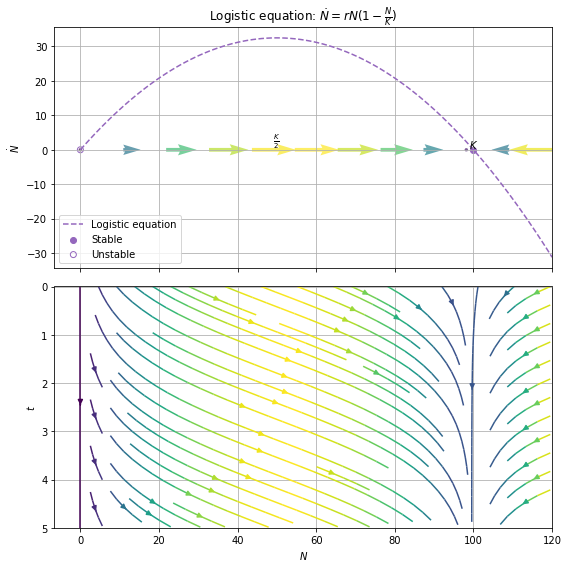

In [81]:
import matplotlib.pyplot as plt
import numpy as np

r = 1.3
K = 100

def logistic(x, r, K):
    y = r * x * (1 - x / K)
    return y

def flow(x0, t0, iteration, dt):
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        
        xs = np.append(xs, xi + logistic(xi, r, K)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts



N = np.linspace(0, 120, 100)
N_dot = logistic(N, r=r, K=K)

fig, ax = plt.subplots(figsize=(8, 8), nrows=2, sharex=True)

stable = K
ax[0].scatter(stable, logistic(stable, r=r, K=K), label='Stable', marker='o', c=c[4], alpha=1)

unstable = 0
ax[0].scatter(unstable, logistic(unstable, r=r, K=K), label='Unstable', marker='o', facecolor='none', edgecolor=c[4], alpha=1)

ax[0].plot(N, N_dot, label='Logistic equation', color=c[4], linestyle='--', alpha=1)

x_flow = np.linspace(0, 120, 12)
y_flow = np.repeat(0, len(x_flow))
l_flow = logistic(x_flow, r=r, K=K)
ax[0].quiver(x_flow, y_flow, l_flow, 0, np.abs(l_flow), alpha=.7)

ax[0].text(50, 0, r'$\frac{K}{2}$', ha='center', va='bottom')
ax[0].text(100, 0, r'$K$', ha='center', va='bottom')

ax[0].set_title('Logistic equation: ' 
                r'$\dot{N} = rN (1 - \frac{N}{K} )$')

ax[0].set_ylabel(r'$\dot{N}$')
ax[0].legend(loc='lower left')
ax[0].grid(True)

x0s = np.linspace(0, 120, 20)

# for x0 in x0s:
#     xs, ts = flow(x0, 0, 80, .1)
#     ax[1].plot(xs, ts, color=c[2])

n = 10
x, t = np.linspace(0, 120, n), np.linspace(0, 5, n)
X, T = np.meshgrid(x, t)
ax[1].streamplot(X, T, logistic(X, r, K), np.tile(1, (n, n)), color=np.abs(logistic(X, r, K)), cmap='viridis')
# ax[1].plot(x, t, color=c[2])
ax[1].set_xlabel(r'$N$')
ax[1].set_ylabel(r'$t$')
ax[1].set_ylim(5.0, 0.0)
ax[1].grid(True)


plt.tight_layout()
plt.savefig('fig/fig020303-04.png')
plt.show()

### 02.03.01. Critique of the Logistic Model

## 02.04. Linear Stability Analysis
---

Let 
- $ x\ast $: fixed point

$$ \eta(t) = x(t) - x\ast $$

$$ \dot{\eta} = \frac{d}{dt} (x - x\ast) = \dot{x} $$

- $ x\ast $: constant

$$ \dot{\eta} = \dot{x} = f(x) = f(x\ast + \eta) $$

Taylor's expansion:
$$ f(x\ast + \eta) = f(x\ast) + \eta f'(x\ast) + O(\eta^2) $$

- $ O(\eta^2) $: quadratically small term in $ \eta $

$$ \dot{\eta} = \eta f'(x\ast) + O(\eta^2) $$

$$ \dot{\eta} \approx \eta f'(x\ast) $$



### Example 2.4.1

using linear stability analysis:
$$ \dot{x} = \sin{x} $$

*Solution:*

$$
    \begin{align*}
        f'(x*) 
        &= \cos k\pi \\
        &=
        \begin{cases}
            1, &\quad k \, \text{even} \\
            -1, &\quad k \, \text{odd}
        \end{cases}
    \end{align*}
$$

### Example 2.4.2

using linear stability analysis 

*Solution:*

$$ f(N) = rN(1 - \frac{N}{K}) $$

$ N* = 0 $, $ N* = K $

$$ f'(N) = r - \frac{2rN}{K} $$

$ f'(0)=r $, $ f'(K)=-r $

### Example 2.4.3

1. $ \dot{x} = - x^3 $
2. $ \dot{x} = x^3 $
3. $ \dot{x} = x^2 $
4. $ \dot{x} = 0 $



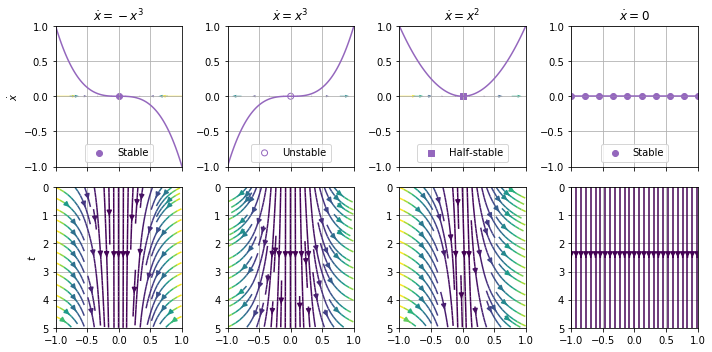

In [88]:
def f(x, fn):
    if fn == 0:
        return - x**3
    elif fn == 1:
        return x**3
    elif fn == 2:
        return x**2
    elif fn == 3:
        return 0

# def flow(x1, x2, num):
#     x_flow = np.linspace(x1, x2, num)
#     y_flow = np.repeat(0, len(x_flow))
#     l_flow = f(x_flow)
#     plt.quiver(x_flow, y_flow, l_flow, 0)

def flow(x0, t0, iteration, dt, fn):
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        
        xs = np.append(xs, xi + f(xi, fn)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts
    
x = np.linspace(-1, 1, 100)
x_f = np.linspace(-1, 1, 10)
x0s = np.linspace(-1, 1, 10)

n = 10
X, T = np.meshgrid(np.linspace(-1.0, 1.0, n), np.linspace(0.0, 5.0, n))

fig, ax = plt.subplots(ncols=4, nrows=2, sharex=True, figsize=(10, 5))

titles = np.array([r'$\dot{x} = - x^3$', 
                    r'$\dot{x} = x^3$', 
                    r'$\dot{x} = x^2$', 
                    r'$\dot{x} = 0$'])

for i, title in zip(range(4), titles):
    if i in range(3):
        ax[0,i].plot(x, f(x, i), color=c[4])#, label=titles[i])
    if i == 3:
        ax[0,i].plot(x, np.repeat(0, len(x)), color=c[4])
    ax[0,i].quiver(x_f, np.repeat(0, len(x_f)), f(x_f, i), 0, np.abs(f(x_f, i)), cmap='viridis')#, alpha=.7)
    
    if i == 0:
        ax[0,i].scatter(0, 0, marker='o', label='Stable', c=c[4])
    elif i == 1:
        ax[0,i].scatter(0, 0, marker='o', label='Unstable', facecolor='none', edgecolor=c[4])
    elif i == 2:
        ax[0,i].scatter(0, 0, marker='s', label='Half-stable', c=c[4])
    elif i == 3:
        ax[0,i].scatter(x_f, np.repeat(0, len(x_f)), marker='o', label='Stable', c=c[4])
    
    ax[0,i].set_title(title)
    ax[0,i].grid(True)
    ax[0,i].legend(loc='lower center')
    ax[0,i].set_xlim(-1, 1)
    ax[0,i].set_ylim(-1,1)
    ax[0,0].set_ylabel(r'$\dot{x}$')
    
#     for x0 in x0s:
#         xs, ts = flow(x0, 0, 50, .1, i)
#         ax[1,i].plot(xs, ts, color=c[2])
    
    if i == 3:
        ax[1,i].streamplot(X, T, np.tile(0, (n, n)), np.tile(1, (n, n)), color=np.tile(0, (n, n)), cmap='viridis')
    else:
        ax[1,i].streamplot(X, T, f(X, i), np.tile(1, (n, n)), color=np.abs(f(X, i)), cmap='viridis')
    ax[1,i].grid(True)    
    ax[1,i].set_ylim(5,0)
    ax[1,0].set_ylabel(r'$t$')

plt.tight_layout()
plt.savefig('fig/fig020401.png')
plt.show()

## 02.05. Existence and Uniquness
---

$ \dot{x} = f(x) $

### Example 2.5.1

$$ \dot{x} = x^{\frac{1}{3}} $$

*Solution:*

$$ \int x^{-\frac{1}{3}} dx = \int dt $$

$$ \frac{3}{2} x^{\frac{2}{3}} = t + C $$



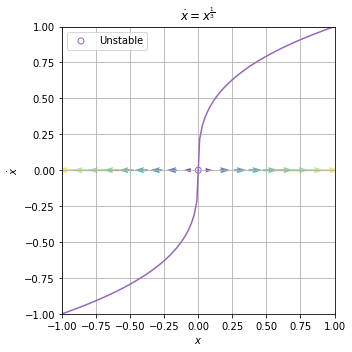

In [91]:
# def f_inv(y):
#     x = y**3
#     return x

def f(x):
    x_abs = np.absolute(x)
    y_abs = x_abs**(1/3)
    return y_abs * np.sign(x)

x = np.linspace(-1, 1, 100)
x_f = np.linspace(-1, 1, 20)

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, f(x), c=c[4])
ax.quiver(x_f, 0, f(x_f), 0, np.abs(f(x_f)), alpha=.7)
ax.scatter(0, 0, marker='o', label='Unstable', facecolor='none', edgecolor=c[4])
ax.set_title(r'$\dot{x} = x^{\frac{1}{3}}$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\dot{x}$')
ax.legend(loc='best')
ax.grid(True)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

plt.tight_layout()
plt.savefig('fig/fig020501.png')
plt.show()

### Example 2.5.2

$$
    \begin{align*}
        \dot{x} &= 1 + x^2 \\
        x(0) &= x_0
    \end{align*}
$$

## 02.06. Impossibility of Oscillations
---

### 02.06.01. Mechanical Analog: Overdamped Systems

$ \dot{x} = f(x) $ can't oscillate
limiting case of Newton's law

intertia term $ m\ddot{x} $ is negligible

$$ m\ddot{x} + b\dot{x} = F(x) $$

$ b\dot{x} \gg m\ddot{x} $

## 02.07. Potentials
---

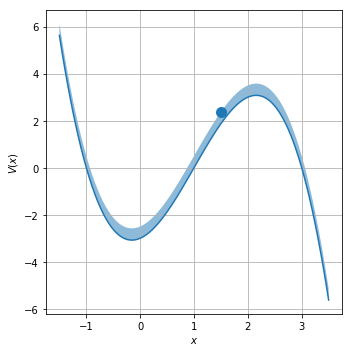

In [299]:
def V(x):
    return -(x + 1) * (x - 1) * (x - 3)

x = np.linspace(-1.5, 3.5, 100)
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, V(x))
ax.scatter(1.5, V(1.5)+.5, linewidth=5)
ax.fill_between(x, V(x), V(x)+.5, where=V(x)+.5 >= V(x), facecolor=c[0], alpha=.5)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$V(x)$')
ax.grid(True)

plt.tight_layout()
plt.savefig('fig/fig020701.png')
plt.show()

another way to visualize 1st-order system $ \dot{x} = f(x) $

$$ \dot{x} = f(x) = - \frac{dV}{dx} $$

$$ \frac{dV}{dt} = \frac{dV}{dx} \frac{dx}{dt} $$

$$ \frac{dx}{dt} = - \frac{dV}{dx} $$

$$ \frac{dV}{dt} = - \Big( \frac{dV}{dx} \Big)^2 ≤ 0 $$


### Example 2.7.1

Graph the potential fot the system: $ \dot{x} = - x $

*Solution:*

$ - \frac{dV}{dx} = -x $
general solution: $ V(x) = \frac{1}{2} x^2 + C $

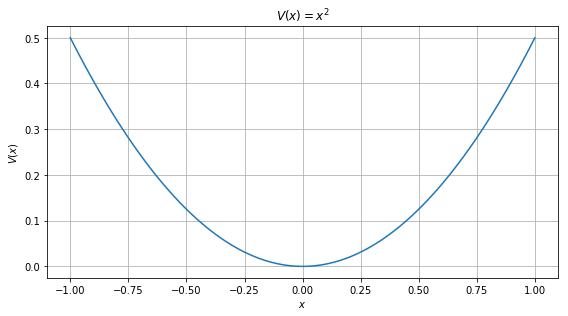

In [26]:
def f(x):
    V = 1/2 * x**2
    return V

x = np.linspace(-1, 1, 100)
V = f(x)

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.plot(x, V)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$V(x)$')
ax.set_title(r'$V(x) = x^2$')
ax.grid(True)

plt.tight_layout()
plt.show()

### Example 2.7.2

Graph the potential for the system: $ \dot{x} = x - x^3 $

*Solution:*

$ -\frac{dV}{dx} = x-x^3 $
$$ V = -\frac{1}{2} x^2 + \frac{1}{4} x^4 + C $$

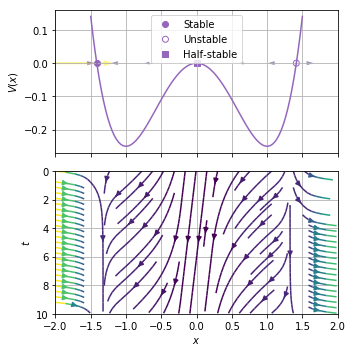

In [96]:
def x_dot(x):
    return x - x**3

def V(x): 
    return - 1/2 * x**2 + 1/4 * x**4

x = np.linspace(-1.5, 1.5, 100)

stable, unstable = - np.sqrt(2), np.sqrt(2)
# unstable = 0

flow = np.linspace(-2, 2, 10)

# plt.quiver(x_f, np.repeat(0, len(x_f)), f(x_f), 0, alpha=.7)

fig, ax = plt.subplots(figsize=(5, 5), nrows=2, sharex=True)

ax[0].plot(x, V(x), color=c[4])
ax[0].quiver(flow, 0, V(flow), 0, np.abs(V(flow)), alpha=.5)
ax[0].scatter(stable, V(stable), marker='o', label='Stable', c=c[4])
ax[0].scatter(unstable, V(unstable), marker='o', label='Unstable', facecolor='none', edgecolor=c[4])
ax[0].scatter(0, f(0), marker='s', label='Half-stable', facecolor=c[4])#, edgecolor=c[2], fillstyle='right')

ax[0].set_ylabel(r'$V(x)$')
ax[0].set_xlim(-2.0, 2.0)
ax[0].legend(loc='best')
ax[0].grid(True)

n = 10
x, t = np.linspace(-2, 2, n), np.linspace(0, 10, n)
X, T = np.meshgrid(x, t)

ax[1].streamplot(X, T, V(X), np.tile(1, (n, n)), color=np.abs(V(X)), cmap='viridis')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$t$')
ax[1].set_ylim(10, 0)

ax[1].grid(True)

plt.tight_layout()
plt.savefig('fig/fig020703.png')
plt.show()

## 02.08. Solving Equations on the Computer
---

- graphical
- analytical 
- **numerical method**


**numerical intergration**


### 02.08.01. Euler's Method

$$ \dot{x} = f(x) $$

$$
    \begin{align*}
        x(t_0 + \Delta t) &\approx x_1 \\
        &= x_0 + f(x_0) \Delta t
    \end{align*}
$$

$$ x_{n+1} = x_n + f(x_n) \Delta t $$

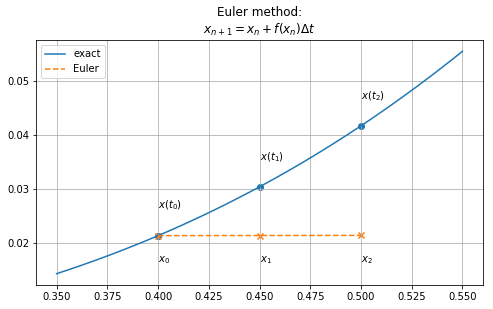

In [21]:
"""
dx/dt = f(x) = x**(-1/2)
x(t) = F(x) = 2 * x**(1/2)
euler:
    x_n+1 = x_n + f(x_n)Δt
"""


def f(x):
    y = x**2
    return y

def F(x):
    y = 1/3 * x**3
    return y

def euler(x0, n, t):
    x = np.array([x0])
    
    for i in range(n):
        x_n = x[i]
        x_n1 = x_n + f(x_n) * t
        x_n1 = np.array([x_n1])
        x = np.append(x, x_n1)
    
    return x

x = np.linspace(0.35, 0.55, 100)

t = np.arange(0.4, 0.51, 0.05)

label = np.array([r'$x(t_0)$', r'$x(t_1)$', r'$x(t_2)$'])
label_2 = np.array([r'$x_0$', r'$x_1$', r'$x_2$'])

plt.figure(figsize=(8, 4.5))

plt.plot(x, F(x), label='exact', c=c[0])

# exact
for t_i, l_i in zip(t, label):
    plt.scatter(t_i, F(t_i), c=c[0])
    plt.text(t_i, F(t_i)+0.005, l_i)

eul = euler(F(0.4), 2, 0.05)

for t_i, l_i, eul_i in zip(t, label_2, eul):
    plt.scatter(t_i, eul_i, c=c[1], marker='x')
    plt.text(t_i, eul_i-0.005, l_i)
    
plt.plot(t, eul, c=c[1], label='Euler', linestyle=l[1])
plt.legend(loc='best')
plt.grid(True)
plt.title('Euler method:\n' r'$x_{n+1}=x_n+f(x_n)\Delta t$')
plt.show()

# x_n1 = euler(0.4, 2, 0.2)
# print(eul)

**fourth-order Runge-Kutta method**

$$
    \begin{cases}
        k_1 = f(x_n) \Delta t \\
        k_2 = f(x_n + \frac{1}{2} k_1) \Delta t \\
        k_3 = f(x_n + \frac{1}{2} k_2) \Delta t \\
        k_4 = f(x_n + k_3) \Delta t \\
    \end{cases} \\
    x_{n+1} = x_n + \frac{1}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)
$$

In [12]:
def f(x):
    y = x ** 2
    return y

def RK(x0, n, t):
    x = np.array([x0])
    # y = np.array([])
    
    for i in range(n):
        x_n = x[i]
        
        k_1 = f(x_i) * t
        k_2 = f(x_i + k_1/2) * t
        k_3 = f(x_i + k_2/2) * t
        k_4 = f(x_i + k_3) * t
        
        x_n1 = x_n + 1/6 *(k_1 + k_2*2 + k_3*2 + k_4)
        x_n1= np.array([x_n1])
        x = np.append(x, x_n1)
        
    return x



t = np.linspace(0.1, 1, 100)

x_RK = RK(0.1, 0.1, 10)
t_RK = np.linspace(0.1, 1.0, 10)

plt.plot(t, f(t))
plt.plot(t_RK, x_RK)

plt.show()

TypeError: 'float' object cannot be interpreted as an integer

### Example 2.8.1

Solve the system $\dot{x} = x (1 - x)$ numerically

*Solution:*



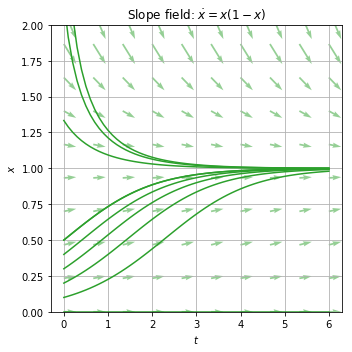

In [331]:
def f(x):
    y = x - x**2
    return y

def slope(x0, t0, dt, iteration):
    
    xs = np.array([x0])
    ts = np.array([t0])
    
    for i in range(iteration):
        xi = xs[i]
        ti = ts[i]
        xs = np.append(xs, xi + f(xi)*dt)
        ts = np.append(ts, ti + dt)
    return xs, ts
    
    
T, X = np.meshgrid(np.linspace(0, 6, 10), np.linspace(0, 2.1, 10))

# flow = f(x)
# Flow = np.tile(flow, (10, 1))
# Flow = np.transpose(Flow)

fig, ax = plt.subplots(figsize=(5, 5))

ax.quiver(T, X, np.tile(1, (len(T), len(X))), f(X), color=c[2], alpha=.5)

# x0s, t0s, nums = np.array([0.01, 2]), np.array([0, 8]), np.array([1, 2])
# x0s, t0s = np.float32(np.random.rand(50)*2), np.float32(np.random.rand(50)*10)
x0s = np.append(np.linspace(0, .5, 6), np.linspace(.5, 3, 4))#, np.linspace(1, 3, 2), axis=0)
# t0s = np.linspace(0.001, 6, 50)
# x0s = np.sin(t0s*5) +1

# plt.streamplot(T, X, np.tile(0, (len(t), len(x))), Flow)

for x0 in x0s:
    xs, ts = slope(x0, 0, 0.1, 60)#900 - np.int_(t0)*100)
    ax.plot(ts, xs, c=c[2])
    #plt.text(t0, x0, (r'$(%.2f, %.2f)$' % (t0, x0)))

# x_slope, t_slope = slope(2, 4, 0.01, 600)
# plt.plot(t_slope, x_slope, c=c[1], label=r'$(t_0, x_0)=(4.0,2.0)$')

# x_slope, t_slope = slope(0.01, 0, 0.01, 1000)
# plt.plot(t_slope, x_slope, c=c[2], label=r'$(t_0, x_0)=(0.0,0.01)$')

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_title('Slope field: ' r'$\dot{x} = x(1-x)$')
# plt.legend(loc='best')
ax.grid(True)
ax.set_ylim(0.0, 2.0)

plt.tight_layout()
plt.show()

# print(T.shape)
# print(X.shape)
# print(x_slope)
# print(t_slope.shape)

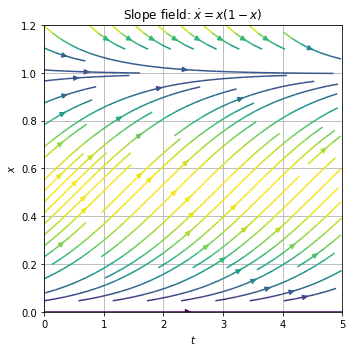

In [342]:
def x_dot(x):
    x_ = x - x**2
    return x_
    
T, X = np.meshgrid(np.linspace(0, 5, 10), np.linspace(0.0, 1.2, 10))

# plt.figure(figsize=(8, 4.5))
fig, ax = plt.subplots(figsize=(5,5))

ax.streamplot(T, X, np.tile(1, (len(t), len(x))), x_dot(X), 
               color=np.abs(x_dot(X)), cmap='viridis', 
               #startpoints=np.array([[], []])
               density=1)

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_xlim(0, 5)
ax.set_ylim(0, 1.2)
ax.set_title('Slope field: ' r'$\dot{x} = x(1-x)$')
ax.grid(True)
# plt.colorbar()

plt.tight_layout()
plt.savefig('fig/fig020803.png')
plt.show()

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    y = x * (x + 1) *(x - 1)
    return y

def flow(x1, x2, num):
    x_flow = np.linspace(x1, x2, num)
    y_flow = np.repeat(0, len(x_flow))
    l_flow = f(x_flow)
    plt.quiver(x_flow, y_flow, l_flow, 0)

def plot_fx(x1, x2, num):
    x = np.linspace(x1, x2, num)
    y = f(x)
    plt.plot(x, y)

plot_fx(-1.1, 1.1, 100)
flow(-1.1, 1.1, 10)

stable = 0
unstable = [-1, 1]

def plot_stable(stable):
    plt.scatter(stable, f(stable), label='stable', marker='o')

def plot_unstable(unstable):
    plt.scatter(unstable, f(unstable), label='unstable', marker='x')
    
plot_stable(stable)
plot_unstable(unstable)
    
plt.title('')
plt.xlabel('')
plt.ylabel('')
# plt.legend(loc='upper right')
plt.grid(True)
plt.show()

TypeError: can only concatenate list (not "int") to list

---
**Overview**

- [2.0 Introduction](#2.0-Introduction)
- [2.1 A Geometric way of Thinking](#2.1-A-Geometric-way-of-Thinking)
- [2.2 Fixed Points and Stability](#2.2-Fixed-Points-and-Stability)
    - [Example 2.2.1](#Example-2.2.1)
    - [Example 2.2.2](#Example-2.2.2)
    - [Example 2.2.3](#Example-2.2.3)
- [2.3 Population Growth](#2.3-Population-Growth)
    - [Critique of the Logistic Model](#Critique-of-the-Logistic-Model)
- [2.4 Linear Stability Analysis](#2.4-Linear-Stability-Analysis)
    - [Example 2.4.1](#Example-2.4.1)
- [2.5 Existence and Uniquness](#2.5-Existence-and-Uniquness)
    - [Example 2.5.1](#Example-2.5.1)
    - [Example 2.5.2](#Example-2.5.2)
- [2.6 Impossibility of Oscillations](#2.6-Impossibility-of-Oscillations)
    - [Mechanical Analog: Overdamped Systems](#Mechanical-Analog:-Overdamped-Systems)
- [2.7 Potentials](#2.7-Potentials)
    - [Example 2.7.1](#Example-2.7.1)
- [2.8 Solving Equations on the Computer](#2.8-Solving-Equations-on-the-Computer)
    - [Euler's Method](#Euler's-Method)